# <div style="font-family:'JetBrains Mono',serif;"> **PyTorch：深度学习框架**<br>


## <div style="font-family:'JetBrains Mono',serif;">PyTorch中的基本数据结构是张量（Tensors）

In [ ]:
import torch

In [ ]:
my_list = [[1, 2, 3], [4, 5, 6]]

tensor = torch.tensor(my_list)

print(tensor)
print(tensor.dtype)

tensor([[1, 2, 3],
        [4, 5, 6]])
torch.int64


<font size=4><div style="font-family:'JetBrains Mono',serif;">
两个张量（tensor）形状相同，即尺寸完全一致，则可以兼容<br>
print(a + c)<br>
The size of tensor a (2) must match the size of tensor c (3) at non-singleton dimension 1
</p></front>

In [ ]:
a = torch.tensor([[1, 1],
                  [2, 2]])

b = torch.tensor([[2, 2],
                  [3, 3]])

c = torch.tensor([[2, 2, 4],
                  [3, 3, 5]])

print(a + b)
print(a * b)
print(a @ b) #

tensor([[3, 3],
        [5, 5]])
tensor([[2, 2],
        [6, 6]])
tensor([[ 5,  5],
        [10, 10]])


## <div style="font-family:'JetBrains Mono',serif;">使用PyTorch Tensors构建第一个神经网络

<div style="font-family: 'SimSun','JetBrains Mono',serif;">神经网络由输入层、隐藏层和输出层组成 <br>


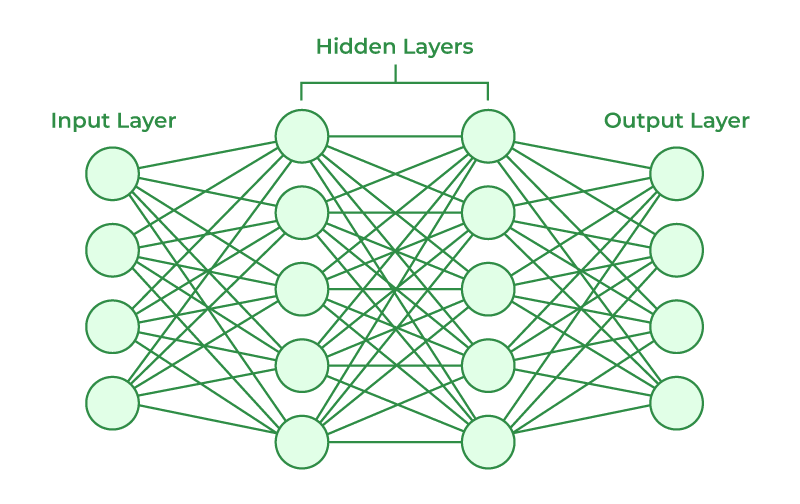

In [ ]:
'''
在设计神经网络的时候，输入层和输出层纬度是预先定义的；

·输入层中的神经元数量就是数据集中的特征数量
 Input neurons = features

·输出层的神经元数量就是我们要想预测的类别数量
 Output neurons = classes
'''

In [ ]:
# 把'torch.nn'简写成'nn'
import torch.nn as nn

#创建一个具有三个特征的'input_tensor'
input_tensor = torch.tensor(
    [[0.3471, 0.4547, -0.2356]]
)

#接下来将这个'input_tensor'传递给线性层，它使用线性函数进行预测
'''
定义我们的线性函数
 nn.Linear接受两个参数：
 ·'in_features'是输入中的特征数量
 ·'out_features'是所需的输出张量大小

正确指定'in_features'可确保我们的线性层可以接收'input_tensor'
注意我们线性层中指定了'out_features'为2，因此输出具有两个特征或神经元
'''
linear_layer = nn.Linear(
    in_features = 3,
    out_features = 2
)

# 最后我们将'input_tensor'传递给'linear_layer'来生成输出
# 这个传递过程中会执行线性运算以包含权重(weight)和偏差(bias)
output = linear_layer(input_tensor)

print(output)
print(linear_layer.weight)
print(linear_layer.bias)

tensor([[-0.2374,  0.0979]], grad_fn=<AddmmBackward0>)
Parameter containing:
tensor([[ 0.4640, -0.1863, -0.1156],
        [ 0.3832, -0.5222, -0.5124]], requires_grad=True)
Parameter containing:
tensor([-0.3410,  0.0817], requires_grad=True)


<font size=5><div style="font-family: 'SimSun','JetBrains Mono',serif;">
## nn.Sequential()：一个用于按顺序堆叠层的PyTorch容器<br>
  使用'nn.Sequential()'堆叠三个线性层<br>
  该神经网络获取输入，按顺序将其传递给每个线性层，然后返回输出
</p></font>




In [ ]:
'''
 'nn.Sequential()'内的层是隐藏层(Hidden Layers)

 ·'n_features'：输入特征的数量
 ·'n_classes'：输出类的数量

 `'n_features'和'n_classes'的数量都由数据集定义
'''
model = nn.Sequential(
    nn.Linear(n_features, 8),
    nn.Linear(8, 4)
    nn.Linear(4, n_classes)
)

<div style="font-family:'JetBrains Mono',serif;"><font size=4>
增加隐藏层的数量会增加模型中的参数总数，也称为模型容量<br>
容量更高的模型可以处理更复杂的数据集，但可能需要更长的时间来训练
</front>

In [ ]:
model_1 = nn.Sequential(
    # 第一层采用10个特征并输出8个
    nn.Linear(10, 18),
    nn.Linear(18, 20),
    nn.Linear(20, 5)
)

<font size=4>当某一层的神经元都与前一层的所有神经元相连接时，该层就被全连接了<br>
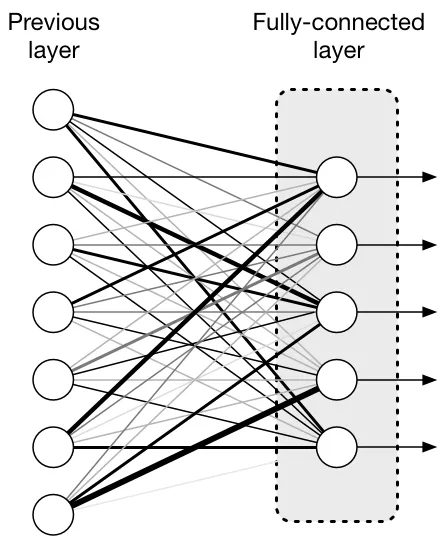


<div style="font-family:'JetBrains Mono',serif;"><font size=4>
评估模型容量的有效方法是计算其参数总数:<br>
(了解参数数量有助于我们平衡模型的复杂性和效率)
</front>

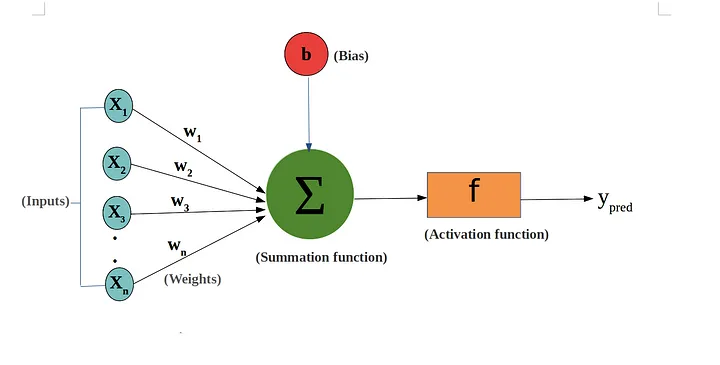

In [ ]:
import torch.nn as nn
# 该模型是一个两层神经网络

model_0 = nn.Sequential(

    nn.Linear(8, 4),

  # 第一层：4个神经元，每个神经元有 8(weight) + 1(bias) = 9 个参数
  # 9 * 4 = 36 个参数


    nn.Linear(4, 2)

  # 第二层：2个神经元，每个神经元有 4(wight) + 1(bias) = 5 个参数
  # 5 * 2 = 10 个参数

)

# 因此该模型有 36 + 10 = 46 个参数

# 我们还可以使用'.numel'方法在PyTorch中计算神经网络的总参数
total = 0

for p in model_0.parameters():
  total += p.numel()

print(total)

46


<div style="font-family:'JetBrains Mono',serif;"><font size=4>
了解参数数量有助于我们平衡模型的复杂性和效率<br>
参数过多会导致训练时间过长或过拟合，而参数过少可能会限制学习能力
</font>

## <div style="font-family:'JetBrains Mono',serif;">**激活函数 Activation fuctions**
<div style="font-family:'JetBrains Mono',serif;"><font size=4>可以使用激活函数为模型添加非线性<br>
这种非线性允许网络学习输入和目标之间比线性关系更加复杂的交互<br>
我们将最后一个线性层的输出称为：预激活(Pre-activation)</font>

<div style="font-family:'JetBrains Mono',serif;"><font size=4>用于二分类的sigmoid函数</font>


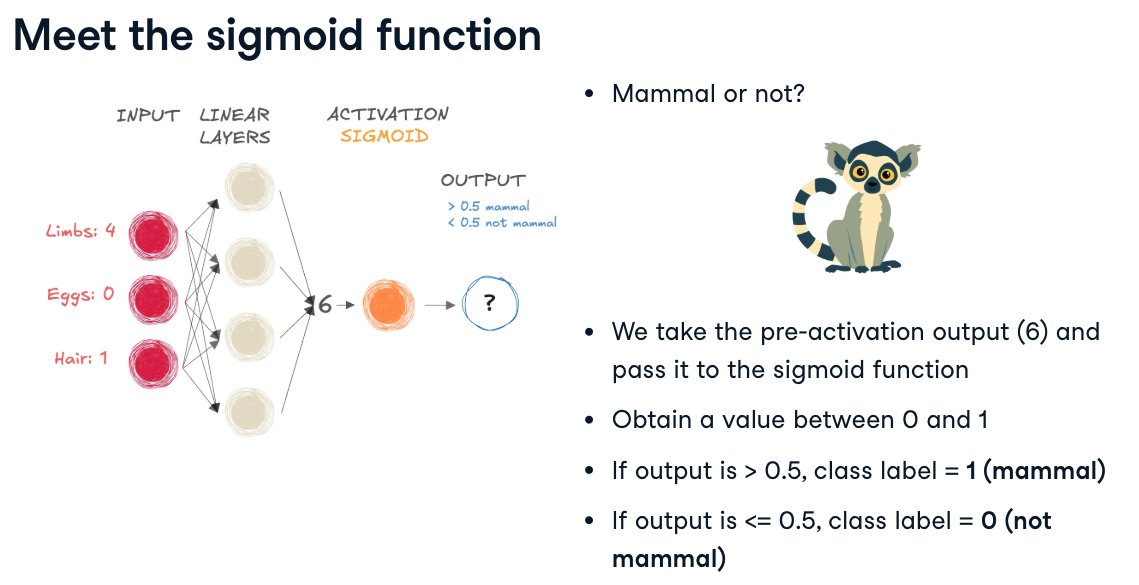

In [ ]:
import torch
import torch.nn as nn
'''
'nn.Sigmoid'接受一个值为6的一维'input_tensor',并返回相同是一维的输出
输出现在介于0和1之间
'''
# 定义sigmoid函数
sigmoid = nn.Sigmoid()

# 定义一个一维tensor，值为6
input_tensor = torch.tensor([[6]])
output = sigmoid(input_tensor)

print(output)

tensor([[0.9975]])


In [ ]:
'''
通常'nn.Sigmoid()'是作为'nn.Sequential()'的最后一步添加的，它会自动转换最终线性层的输出
只有线性层和S激活的神经网络行为类似逻辑回归(Logistic Regression)
'''
model = nn.Sequential(
  # 第一层线性层
    nn.Linear(6, 4),
  # 第二层线性层
    nn.Linear(4, 1),
  # Sigmoid激活函数
    nn.Sigmoid()
)

<div style="font-family:'JetBrains Mono',serif;"><font size=4>
用于多分类的softmax函数<br>
</font>

In [ ]:
'''
假设有三个类别：
0: 鸟类(bird)
1: 哺乳动物(mammal)
2: 爬行动物(reptile)
'''

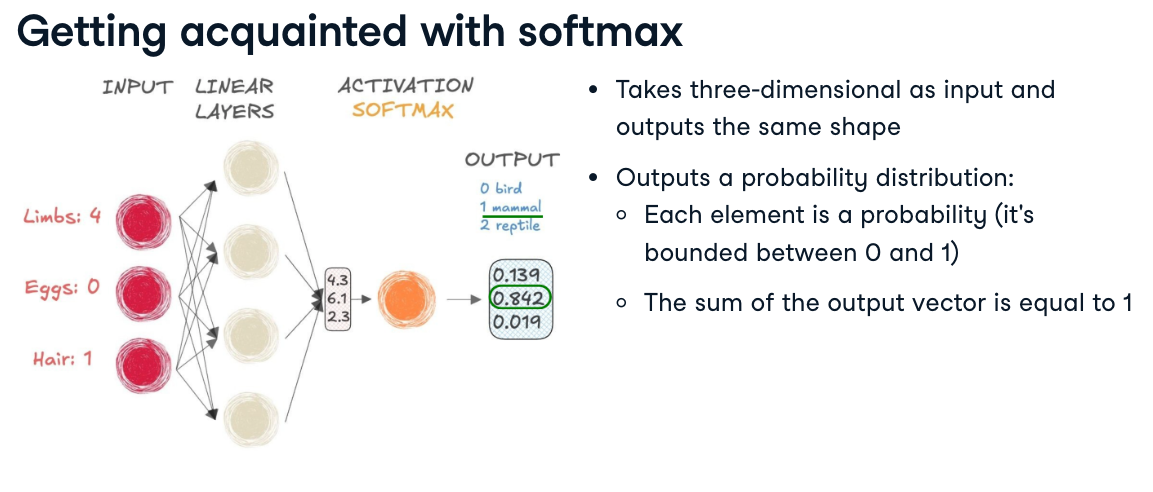

In [ ]:
import torch
import torch.nn as nn

# 创建一个三维的输入tensor
input_tensor = torch.tensor(
    [[4.3, 6.1, 2.3]]
)

# 定义概率函数'softmax', dim = -1 表示将softmax应用于input_tensor的最后一个维度
probabilities = nn.Softmax(dim = -1)

output_tensor = probabilities(input_tensor)
print(output_tensor)


tensor([[0.1392, 0.8420, 0.0188]])


## <div style="font-family:'JetBrains Mono',serif;">**前向传播(forward pass)**

<div style="font-family:'JetBrains Mono',serif;"><font size=4>
当输入数据以正向流经神经网络以产生输出或预测时，它会经过每个网络层。<br>
计算将数据在每一层转换为新的表示，这些表示会传递到下一层，直到产生预测或输出

In [ ]:
'''
前向传播的目的是将输入数据传递通过网络
并根据模型的学习参数(权重weight和偏差bias)产生预测或输出

Possible outputs:
·Binary classification
·Muti-class classification
·Regression
'''

<div style="font-family:'JetBrains Mono',serif;"><font size=4>
1. 二分类的前向传播
<font>

In [ ]:
import torch
import torch.nn as nn

# 创建一个5x6的输入数据, 5 animals, 6 features
input_data = torch.tensor(
    [[-0.4421, 1.5207, 2.0607, -0.3647, 0.4691, 0.0946],
     [-0.9155, -0.0475, -1.3645, 0.6336, -1.9520, -0.3398],
     [0.7406, 1.6763, -0.8511, 0.2432, 0.1123, -0.0633],
     [-1.6630, -0.0718, -0.1285, 0.5396, -0.0288, -0.8622],
     [-0.7413, 1.7920, -0.0883, -0.6685, 0.4745, -0.4245]]
)

# 创建一个具有两个线性层和一个S激活函数的小型网络
model = nn.Sequential(

  # First linear layer
    nn.Linear(6, 4),

  # Second linear layer
    nn.Linear(4, 1),

  # Sigmoid activation function
    nn.Sigmoid()
)

output = model(input_data)
print(output)

'''
通常将'0.5'设置为阈值，将这些概率转换为类标签
例如：1哺乳动物、2非哺乳动物

Class = 1 for values >= 0.5 (0.5343)
Class = 0 for values <  0.5 (0.4269, 0.4773, 0.3816, 0.4232)
'''

tensor([[0.4269],
        [0.4773],
        [0.3816],
        [0.5343],
        [0.4232]], grad_fn=<SigmoidBackward0>)


<div style="font-family:'JetBrains Mono',serif;"><font size=4>
2. 多分类的前向传播

In [ ]:
'''
Class 1 - mammal
Class 2 - bird
Class 3 - reptile
'''

n_class = 3

# 创建多分类模型
model = nn.Sequential(
  # First linear layer
    nn.Linear(6, 4),

  # Second linear layer
    nn.Linear(4, n_class),

  # Softmax activation
  # dim = -1 表示在张量的最后一个维度应用softmax函数
    nn.Softmax(dim = -1)
)
'''
输出中每行代表三个类别的概率，总和为1
每行的预测标签分配给概率最高的类别
第一行是鸟类，第二行是鸟类，第三行是鸟类，第四行爬行动物，第五行也是鸟类
'''
output = model(input_data)
print(output.shape)
print(output)


torch.Size([5, 3])
tensor([[0.2047, 0.5566, 0.2386],
        [0.2377, 0.3996, 0.3627],
        [0.3766, 0.4788, 0.1446],
        [0.1398, 0.3213, 0.5389],
        [0.3240, 0.4583, 0.2177]], grad_fn=<SoftmaxBackward0>)


<div style="font-family:'JetBrains Mono',serif;"><font size=4>
3. 回归(Regression): 预测连续数值

In [ ]:
# 创建逻辑回归模型
model = nn.Sequential(
    nn.Linear(6, 4),
    nn.Linear(4, 1)
)

output = model(input_data)

print(output)

tensor([[-0.0095],
        [ 0.8442],
        [ 0.3989],
        [-0.1695],
        [ 0.0295]], grad_fn=<AddmmBackward0>)


## <div style="font-family:'JetBrains Mono',serif;">**使用损失函数（Loss Fuction）评估模型预测**

<div style="font-family:'JetBrains Mono',serif;"><font size=4>
损失函数是神经网络的另一个组成部分，它告诉我们模型在训练期间的预测能力<br>
损失函数的值越低，说明预测效果越好 <br>
</font>

<div style="font-family:'JetBrains Mono',serif;"><font size=4>
loss = F(y, y') <br>
  y 是真实类别，值通常是整数<br>
  y'是应用softmax函数之前的原始预测， 它是一个与类别数N具有相同维度的张量<br>
  如果N为3，则softmax输出是形状为 1x3 的tensor
</font>

<div style="font-family:'JetBrains Mono',serif;"> <font size=4> 
独热编码: One-hot encoding (真实类别编码) <br>
将一个整数 y 转换为 由 1 和 0 组成的tensor, 以便进行比较来评估模型性能 <br>


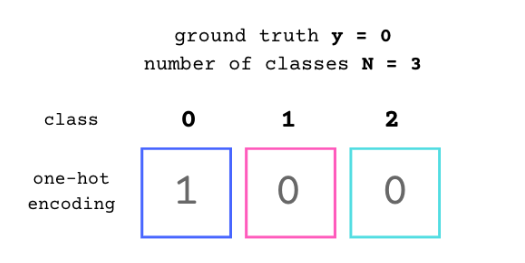

In [ ]:
# 使用独热编码转换标签
import torch.nn.functional as F

print(F.one_hot(torch.tensor(0), num_classes = 3))
print(F.one_hot(torch.tensor(1), num_classes = 3))
print(F.one_hot(torch.tensor(2), num_classes = 3))

tensor([1, 0, 0])
tensor([0, 1, 0])
tensor([0, 0, 1])



<div style="font-family:'JetBrains Mono',serif;">
编码完成之后，我们可以将其与预测 y' 一起传递给损失函数<br>
y'存储为tensor"分数"


In [ ]:
'''
分类最常用的损失函数是交叉熵损失(CrossEntropyLoss)
'''

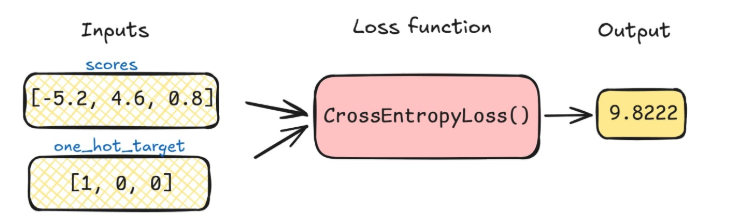

In [ ]:
'''
Input:
·scores - 最终softmax函数之前的模型预测
·one_hot_target - 独热编码的实际标签

Output:
·loss - 单个浮点数
'''

In [ ]:
from torch.nn import CrossEntropyLoss

# 首先定义交叉熵损失函数
criterion = CrossEntropyLoss()

scores = torch.tensor([-5.2, 4.6, 0.8])
one_hot_target = torch.tensor([1, 0, 0])


# 然后将'scores'张量和'one_hot_target'张量的'.double()'方法传递给它
print(criterion(scores.double(), one_hot_target.double()))

tensor(9.8222, dtype=torch.float64)


## <div style="font-family:'JetBrains Mono',serif;">**使用导数（梯度）更新模型参数**

<div style="font-family:'JetBrains Mono',serif;"><font size=4>
当损失较高时，模型的预测效果会很差，我们可以使用导数（梯度）来最小化这种损失<br>
将损失函数想象成一个山谷。导数表示斜率，即曲线上升或下降的陡峭程度。<br>
陡坡（红色箭头表示） 表示导数较高且台阶较大。缓坡（绿色節头表示）的导数较小旦台阶较小。<br>
在山谷底部 （蓝色箭头表示），斜率平坦，导数为零。这个点就是损失函数的最小值，我们的目标是达到这个最小值。 <br>
</font>

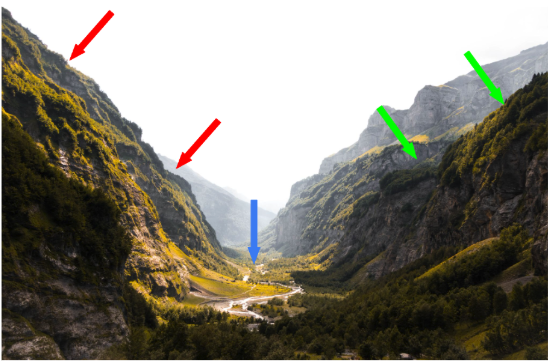

<div style="font-family:'JetBrains Mono',serif;">凸函效有一个全局最小值。<br>非凸函数（例如损失函数） 有多个局部最小值，其中的值低于附近的点，但不是整体最低值。<br>在最小化损失函数时，我们的目标是在 × 近似为 1时找到全局最小值。

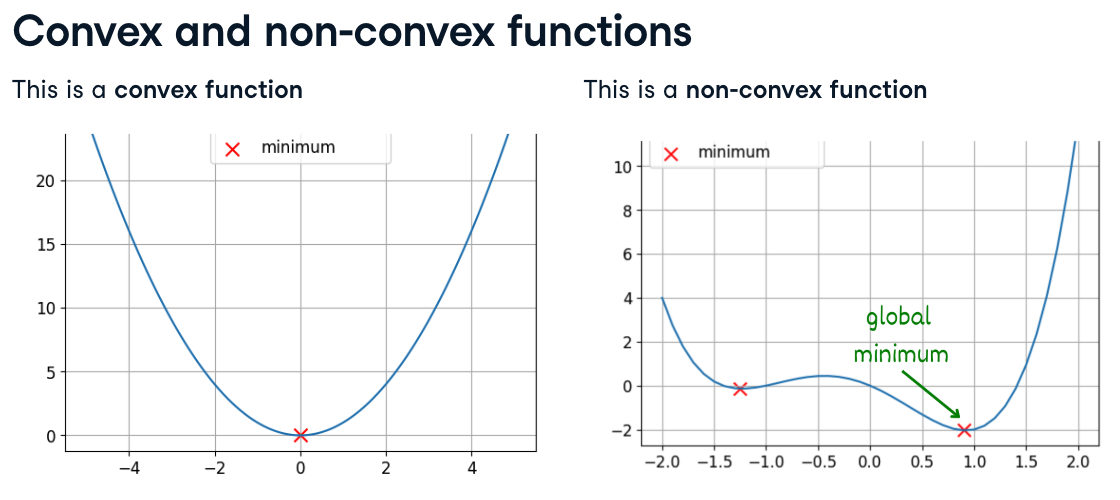

<div style="font-family:'JetBrains Mono',serif;">在创建模型时，层权重和偏差是随机初始化的。<br>
我们在训练期间使用后向传递或反向传播来更新它们。

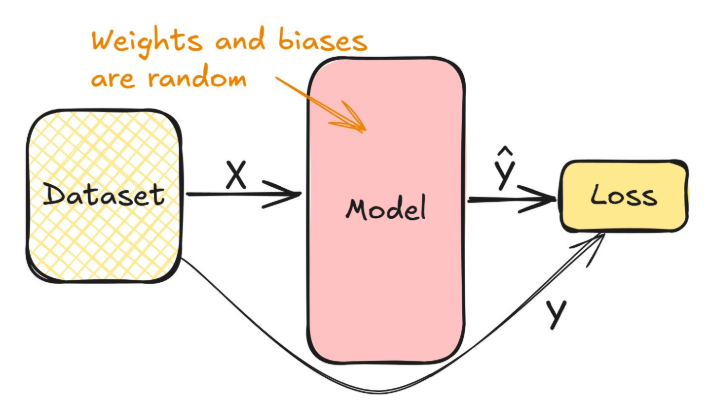
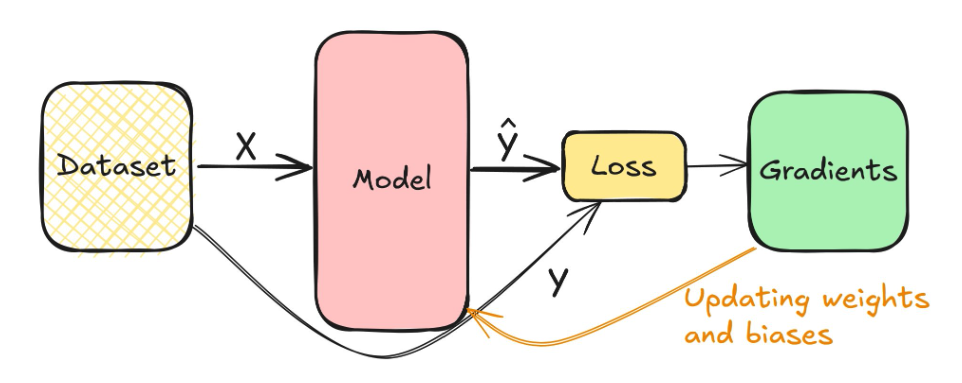

<div style="font-family:'JetBrains Mono',serif;"><font size=4>在深度学习中，导数（Derivatives）被称为梯度（Gradients） <br> 我们计算损失函数梯度并用他们通过反向传播来更新模型参数（weight、bias） <br>
重复这一过程直到调整好各个层

## <div style="font-family:'JetBrains Mono',serif;">**反向传播 backpropagation**

<div style="font-family:'JetBrains Mono',serif;">在反向传播过程中，如果我们考虑一个由三个线性层组成的网络，我们可以根据每层的参数计算局部损失梯度。<br>我们首先根据 L2 参数计算损失梯度，然后计算 L2 和L1的损失梯度，然后重复计算，直到到达第一层。

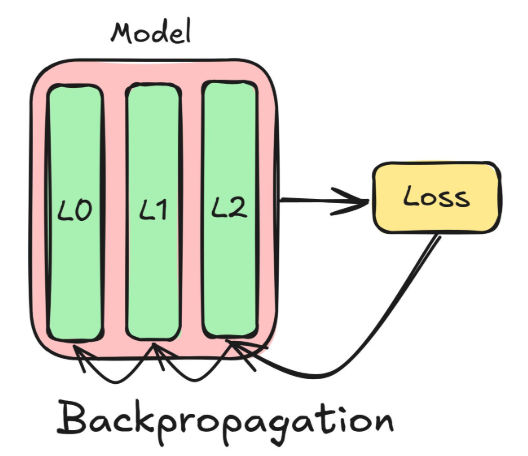

In [ ]:
# 进行一个反向传播
model =  nn.Sequential(
    nn.Linear(16, 8),
    nn.Linear(8, 4),
    nn.Linear(4, 2)
)

prediction = model(sample)

# 计算损失和梯度
criterion = CrossEntropyLoss()
loss = criterion(prediction, target)

'''
使用 .backward()，我们根据此损失计算梯度，这些梯度存储在每层的权重和偏差的.grad属性中。
模型中的每一层都可以从零开始索引，以访问其权重、偏差和梯度。
'''
loss.backward()


In [ ]:
# 手动访问每层的梯度
model[0].weight.grad
model[0].bias.grad

model[1].weight.grad
model[1].bias.grad

model[2].weight.grad
model[2].bias.grad

In [ ]:
'''
为了手动更新模型参数，我们访问每个层的梯度，将其乘以学习率，然后从权重中减去该乘积。
'''
# Learning rate is typically small
lr = 0.001


# Update the weights
weight = model[0].weight
weight_grad = model[0].weight.grad

weight = weight - lr * weight_grad


# Update the biases
bias = model[0].bias
bias_grad = model[0].bias.grad

bias = bias - lr * bias_grad

### <div style="font-family:'JetBrains Mono',serif;"> <font size=4>**梯度下降 Gradient descent** <br>
**非凸函数中,使用梯度下降来找到损失函数的全局最小值**

In [ ]:
import torch.optim as optim

# 创建优化器
'''
.parameters()返回所有模型参数的可迭代对象，我们将其传递给优化器
使用标准学习率'lr'
'''
optimizer = optim.SGD(model.parameters(), lr = 0.001)

'''
优化器会自动计算梯度并使用.step()更新模型参数
'''
optimizer.step()

## <div style="font-family:'JetBrains Mono',serif;">**深入了解数据加载**

In [ ]:
import pandas as pd
import numpy as np

# 使用pd.read_csv()来加载数据集
animals = pd.read_csv('animal_dataset.csv')

# 定义输入特征，选择除第1列和最后1列之外的所有列作为输入特征
features = animals.iloc[:, 1:-1]
X = features.to_numpy()
print(X)

# 定义目标值数组，代表每种动物的类别标签
target = animals.iloc[:, -1]
y = target.to_numpy()
print(y)

[[0 1 1 0 0 2 1]
 [0 1 1 0 1 2 1]
 [1 0 0 1 1 4 1]
 [1 0 0 1 0 4 1]
 [0 0 1 0 1 4 1]]
[0 0 1 1 2]


<div style="font-family:'JetBrains Mono',serif;"><font size=4> 使用 'TensorDataset' 为PyTorch模型准备数据

In [ ]:
import torch

# 从torch.utils.data导入torch和TensorDataset，方便将特征(X)和目标标签(y)存储为张量
from torch.utils.data import TensorDataset

# 使用PyTorch的tensor方法将'X'和'y'转换为张量并将它们传递给TensorDataset
dataset = TensorDataset(torch.tensor(X), torch.tensor(y))

# 访问单个样本，使用方括号索引
input_sample, label_sample = dataset[0]
print('input sample', input_sample)
print('label sample', label_sample)

input sample tensor([0, 1, 1, 0, 0, 2, 1])
label sample tensor(0)


In [ ]:
from torch.utils.data import DataLoader

'''
batch_size: 确定每次迭代包含多少个样本
shuffle: 在每个时期随机化数据顺序，帮助提高模型泛化能力
epoch: 一个epoch是训练DataLoader的一次完整传递
Generalization(泛化): 是该模型在看不见的数据上表现良好，不仅仅是记住训练集
'''
batch_size = 2
shuffle = True

# 创建一个DataLoader, 从而可以轻松地批量迭代我们的数据集
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

# 遍历DataLoader
# DataLoader中每个元素都是一个元组，我们将其解包为'batch_inputs'和'batch_labels'
for batch_inputs, batch_labels in dataloader:
  print('batch_inputs:', batch_inputs)
  print('batch_labels:', batch_labels)

batch_inputs: tensor([[1, 0, 0, 1, 1, 4, 1],
        [1, 0, 0, 1, 0, 4, 1]])
batch_labels: tensor([1, 1])
batch_inputs: tensor([[0, 1, 1, 0, 1, 2, 1],
        [0, 1, 1, 0, 0, 2, 1]])
batch_labels: tensor([0, 0])
batch_inputs: tensor([[0, 0, 1, 0, 1, 4, 1]])
batch_labels: tensor([2])


## <div style="font-family:'JetBrains Mono',serif;">**编写第一个训练循环**

<div style="font-family:'JetBrains Mono',serif;"><font size=4>训练一个神经网络的步骤:<br>
 - 创建模型 <br>
 - 选择损失函数 <br>
 - 定义数据集 <br>
 - 设置优化器 <br>
 - 开始循环训练( 计算损失/前向传播、计算梯度/反向传播、更新模型参数 ) <br>

### <div style="font-family:'JetBrains Mono',serif;">**使用Mean Squared Error Loss 均方误差损失来解决回归问题**

In [ ]:
# MSE损失函数的定义
def mean_squared_loss(prediction, target):
  return np.mean((prediction - target)**2)

<div style="font-family:'JetBrains Mono',serif;"><font size=4>在PyTorch中，使用 nn.MSELoss 函数作为标准

In [ ]:
# In PyTorh
criterion = nn.MSELoss()

# Prediction and target are float tensors
loss = criterion(prediction, target)

In [ ]:
y_pred = np.array([3, 5.0, 2.5, 7.0])
y = np.array([3.0, 4.5, 2.0, 8.0])

# Calculate MSE using NumPy
mse_numpy = np.mean((y_pred - y)**2)

# Create the MSELoss function in PyTorch
criterion = nn.MSELoss()

# Calculate MSE using PyTorch
mse_pytorch = criterion(torch.tensor(y_pred), torch.tensor(y))

print("MSE (NumPy):", mse_numpy)
print("MSE (PyTorch):", mse_pytorch)

MSE (NumPy): 0.375
MSE (PyTorch): tensor(0.3750, dtype=torch.float64)


### <div style="font-family:'JetBrains Mono',serif;"><font size=4>**在训练之前的准备:**

In [ ]:
import torch
import torch.nn as nn
import pandas as pd
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

# 读取数据集
salary = pd.read_csv('DataScienceSalary.csv')

# 设置特征和目标列
features = salary.iloc[:, :-1]
features = features.to_numpy()
print(features)

target = salary.iloc[:, -1]
target = target.to_numpy()
target = target.reshape(-1, 1)  # 将 target 转换为二维张量
print(target)

[[0.  0.  0.5 1. ]
 [1.  0.  1.  2. ]
 [2.  0.  0.  1. ]
 [1.  0.  1.  0. ]
 [2.  0.  1.  1. ]]
[[0.036]
 [0.133]
 [0.234]
 [0.076]
 [0.17 ]]


In [ ]:
import torch.optim as optim

# 创建'dataset' 和 'dataloader'
dataset = TensorDataset(
    torch.tensor(features).float(),
    torch.tensor(target).float ()
)

dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

# 创建模型
model = nn. Sequential(
    nn.Linear (4, 2),
    nn.Linear (2, 1)
)

# 创建损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

<div style="font-family:'JetBrains Mono',serif;"><font size=4>训练循环:

In [ ]:
num_epochs = 5

for epoch in range(num_epochs):
  for data in dataloader:

    # 设置梯度为0
    # 因为优化器默认存储来自前面步骤的梯度
    optimizer.zero_grad()

    # 从dataloader的每个样本中获取特征和目标
    feature, target = data

    # 执行前向传播
    pred = model(feature)

    # 计算损失，反向传播计算梯度
    loss = criterion(pred, target)
    loss.backward()

    # 更新参数
    optimizer.step()

  print(f"Epoch {epoch+1}, Loss: {loss}")


Epoch 1, Loss: 0.002703694859519601
Epoch 2, Loss: 0.024994345381855965
Epoch 3, Loss: 0.0019713155925273895
Epoch 4, Loss: 0.024877173826098442
Epoch 5, Loss: 0.002575839404016733


## <div style="font-family:'JetBrains Mono',serif;"> **ReLU激活函数**

<div style="font-family:'JetBrains Mono',serif;"><font size=4>有时激活函数会过度缩小梯度，导致训练效率低下

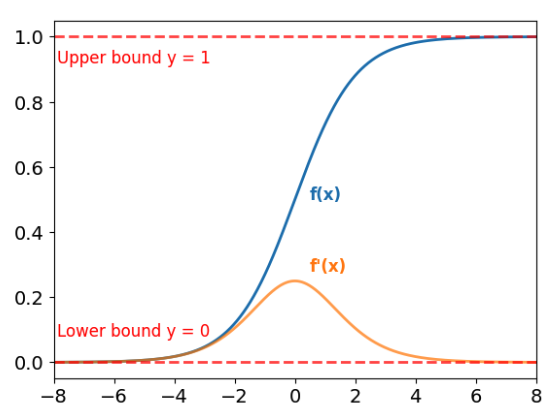

**<div style="font-family:'JetBrains Mono',serif;">Sigmoid函数的输出在0到1之间有界，这意味着对于任何输入，输出始终会落在此范国内。<br>Sigmoid函数可用于网络中的任何点。但是，Sigmoid型函数的梯度（以橙色显示）对于 x的大值和小值都非常小。这种现象称为饱和。<br>在反向传播过程中，这会成为问题，因为每个梯度都依赖于 前一个梯度。<br>当梯度非常小时，它们无法有效地更新权重。这个问题被称为梯度消失问题，它会使深度网络的训练变得非常困难。**

**<div style="font-family:'JetBrains Mono',serif;">softmax 函数也产生在 0到1之间的有界输出，它以类似的方式遭受饱和。<br>因此，这两种激活函数都不是隐藏层的理想选择，最好只在
最后一层使用。**

### <font size=4>**<div style="font-family:'JetBrains Mono',serif;">Rectified Linear Unit 整流线型单元 ReLU**
**<div style="font-family:'JetBrains Mono',serif;">f(x) = max(x, 0)**

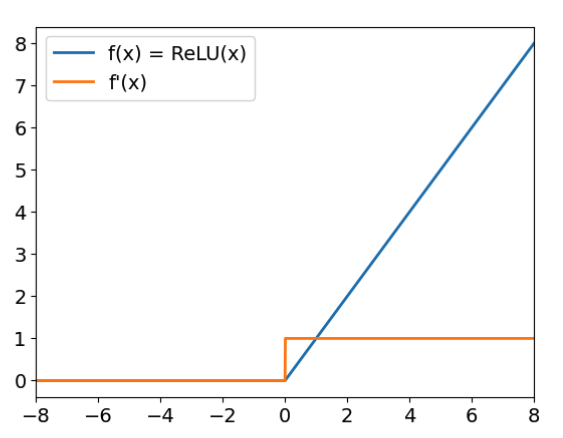

<font size=4>**<div style="font-family:'JetBrains Mono',serif;">此函数没有上限，并且对于较大的 x 值，其梯度不会接近零，这有助于克服梯度消失问题。**

In [ ]:
relu = nn.ReLU()

### **<div style="font-family:'JetBrains Mono',serif;">Leaky ReLU**
<div style="font-family:'JetBrains Mono',serif;">leaky RelU是ReLU函数的变体。<br> 对于正输入，它的行为与 ReLU 完全相同。<br>对于负输入，它将输入乘以一个小系数（在 PyTorch 中默认为
0.01)。<br>这可确保负输入的梯度保持非零，从而防止神经元完全停止学习，而标准 ReLU 可能会发生这种情况。

In [ ]:
leaky_relu = nn.LeakyReLU(
    negative_slope = 0.01
)

## **学习率 learning rate 和动量 momentum**

<font size=4>**<div style="font-family:'JetBrains Mono',serif;">随机梯度下降 SGD 中有两个参数** <br>
**<div style="font-family:'JetBrains Mono',serif;">学习率和动量** <br>
**<div style="font-family:'JetBrains Mono',serif;">学习率控制更新的步长以及动量** <br>
**<div style="font-family:'JetBrains Mono',serif;">步长 = 梯度 x 学习率**



In [ ]:
sgd = optim.SGD(model.parameters(), lr=0.01, momentum=0.95)

**<div style="font-family:'JetBrains Mono',serif;">让我们尝试找到 U 形函数的最小值。我们从x=-2 开始，运行 SGD 优化器十步。<br>经过这些步骤后，我们观察到优化器接近最小值。<br>我们还可以注意到，当我们接近最小值时，步长逐渐减小。发生这种情况的原因是步长是梯度乘以学习率。由于函数在零附近不太陡峭，因此梯度和步长变小。**

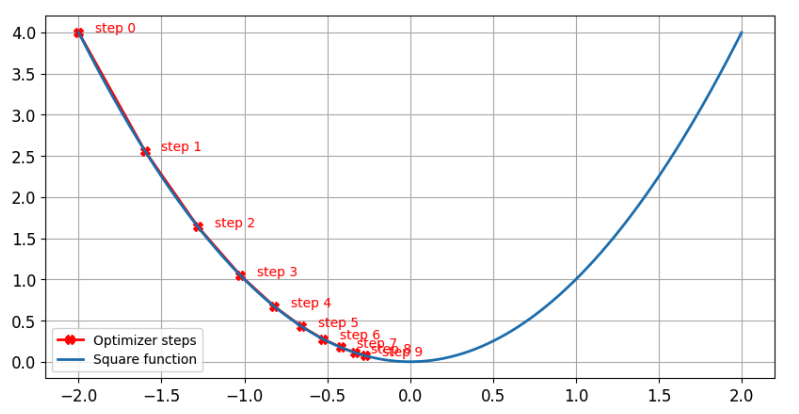

**<div style="font-family:'JetBrains Mono',serif;">尝试寻找非凸函数的最小值时面临的挑战之一是陷入局部最小值**

<div style="font-family:'JetBrains Mono',serif;">总之，两个关键的优化器参数影响训练：学习率和动量。<br>
学习率控制步长，典型值范围为 0.01到 0.0001。 如果太高，优化器可能找不到最小值。如果太低，训练速度会变慢。<br>
动量有助于优化器超越局部最小值。没有它，优化器可能会卡住。这里的典型值范围是 0.85 到 0.99。

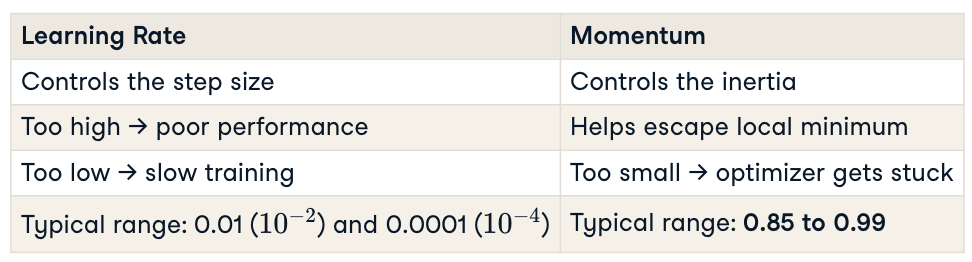

## **<div style="font-family:'JetBrains Mono',serif;">Layer Initialiazation 层初始化**

<font size=4>**<div style="font-family:'JetBrains Mono',serif;">数据规范化会缩放输入特征以保证稳定性；<br>
类似地，线性层的权重也会初始化为较小的值。这称为层初始化。**

In [ ]:
import torch.nn as nn

layer = nn.Linear(66, 128)
print(layer.weight.min(), layer.weight.max())

tensor(-0.1231, grad_fn=<MinBackward1>) tensor(0.1230, grad_fn=<MaxBackward1>)


In [ ]:
# PyTorch提供了一种使用'nn.init'模块初始化层权重的简单方法
import torch.nn as nn

layer = nn.Linear(64, 128)
nn.init.uniform_(layer.weight)

print(layer.weight.min(), layer.weight.max())

tensor(0.0001, grad_fn=<MinBackward1>) tensor(0.9999, grad_fn=<MaxBackward1>)


## **<div style="font-family:'JetBrains Mono',serif;">Transfer Learning 迁移学习**

<font size=4> **<div style="font-family:'JetBrains Mono',serif;">迁移学习采用在第一项任务上训练的模型，并将其重新用于第二项任务。**



<div style="font-family:'JetBrains Mono',serif;"><font size=4>
例如，我们根据美国数据科学家的工资训练了一个模型。我们现在有了欧洲工资的新数据。<br>
我们可以加载第一个模型中的权重并将其用作在这个新数据集上进行训练的起点，而不是使用随机初始化的权重来训练模型。<br>


In [ ]:
# 可以使用'torch.save'和'torch.load'函数保存和加载权重
import torch

layer = nn.Linear(64, 128)
torch.save(layer, 'layer.pth')

new_layer = torch.load('layer.pth')

## **<div style="font-family:'JetBrains Mono',serif;">Fine-tuning 微调**
<font size=4>**<div style="font-family:'JetBrains Mono',serif;">有时，第二个任务与第一个任务相似，我们想要执行一种特定类型的迁移学习，称为微调。**

<div style="font-family:'JetBrains Mono',serif;"><font size=4>**在这种情况下，我们从之前训练的模型中加载权重，但以较小的学习率训练模型。<br>如果我们决定某些网络层不需要训练并选择冻结它们，我们甚至可以训练部分网络。<br>经验法则是冻结网络的早期层并微调更靠近输出层的层。**

In [ ]:
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(64, 128),
    nn.Linear(128, 256)
)

'''
冻结网络的早期层并微调更靠近输出层的层，
通过将每个参数的'require_grad'属性设置为False来实现。

在这里，我们使用模型的'named_parameters()'方法，它返回名称和参数本身。
我们将第一层权重的'require_grad'设置为 False。
'''
for name, param in model.named_parameters():
  if name == '0.weight':
    param.requires_grad = False

## **<div style="font-family:'JetBrains Mono',serif;">评估模型性能**

### **<div style="font-family:'JetBrains Mono',serif;">训练集（80%-90%）、验证集（10%-20%）和测试集（5%-10%）**

**<div style="font-family:'JetBrains Mono',serif;">计算训练损失** <br>
**通过对训练DataLoader中所有批次（batch）的损失进行求和来计算的**

In [ ]:
# 将模型设置为训练模式
model.train()

# 初始化训练损失
training_loss = 0.0

for inputs, Labels in trainloader:

# 前向传播 forward pass
outputs = model (inputs)

# 计算loss
loss = criterion(outputs, labels)

# 反向传播 Backpropagation
loss.backward # Compute gradients
optimizer.step # Update weights
optimizer.zero_grad() # Reset gradients

# 使用'.item()'将每个损失值添加到总数中，它从tensor中提取数值
training_loss += loss.item()

**<div style="font-family:'JetBrains Mono',serif;">验证损失**

In [ ]:
validation_loss = 0.0

model.eval () # '.eval()'将模型设置为评估模式

with torch.no_grad : # 禁用梯度计算
  for inputs, labels in validationloader:

    # Run the forward pass
    outputs = model(inputs)

    # Calculate the loss
    loss = criterion(outputs, labels)
    validation_loss += loss.item()

epoch_loss = validation_loss / len(validationloader) # Compute mean loss

## **<div style="font-family:'JetBrains Mono',serif;">Overfitting 过拟合**
<font size=4> **<div style="font-family:'JetBrains Mono',serif;">当模型过度拟合的时候，训练损失会持续减少，但验证损失会开始上升**

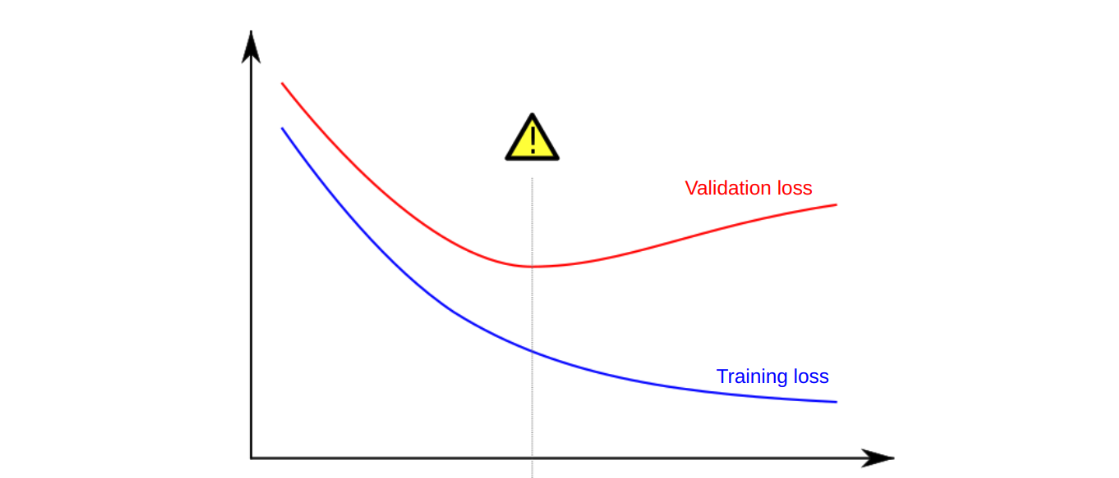

### <font size=4>**<div style="font-family:'JetBrains Mono',serif;">过度拟合的原因:** <br>
**<div style="font-family:'JetBrains Mono',serif;">当模型无法作用到未见过的数据时，就会发生过拟合**<br>

**<div style="font-family:'JetBrains Mono',serif;">如果我们没有正确训练模型，它将开始记忆训练数据，这会导致训练集上的表现良好，但在验证集上的表现不佳。**<br>

**<div style="font-family:'JetBrains Mono',serif;">有几个因素可能导致过度拟合：*数据集太小、模型容量太大或权重值太大*。**

### **<div style="font-family:'JetBrains Mono',serif;">Dropout**
<font size=4> Dropout是一种 “ **<div style="font-family:'JetBrains Mono',serif;">正则化 (Regularization)** ” 技术 <br>

Dropout 层通常在激活函数之后添加。p参数确定神经元被设置为零的概率。

In [2]:
import torch
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(8, 4),
    nn.ReLU(),
    nn.Dropout(p=0.5)
)

features = torch.randn((1, 8))
print(model(features))

tensor([[0.0000, 0.0000, 0.0000, 0.7138]], grad_fn=<MulBackward0>)


**<div style="font-family:'JetBrains Mono',serif;">在训练期间，它会随机停用神经元; 而在评估期间，它会被禁用，以确保所有神经元都处于活动状态以进行稳定的预测。**<br>

**<div style="font-family:'JetBrains Mono',serif;">要在这两种模式之间切换，我们使用 model.train() 和 model.eval()。**

### **<div style="font-family:'JetBrains Mono',serif;">weight_decay 权重衰减**

<div style="font-family:'JetBrains Mono',serif;">在PyTorch 中，使用weight_decay 参数将权重衰減添加到优化器中，通常设置为一个较小的值，例如 0.001。

此参数为损失函数添加了惩罚，鼓励使用较小的权重并帮助模型更好地泛化。

在反向传播期间，从梯度中减去此惩罚，防止权重过度增长。我们将权重表减设置得越高，正则化就越强，从而降低过度拟合的可能性。

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.001, weight_decay=0.0001)

## **<div style="font-family:'JetBrains Mono',serif;">使用' torchmetrics '计算准确率Accuracy**

In [ ]:
import torchmetrics

# 使用'torchmetrics.Accuracy'创建准确度指标
metric = torchmetrics.Accuracy(task="multiclass", num_classes=3)

for features, labels in dataloader:
  # 前向传播
  outputs = model(features)

  # 计算批次准确率(使用'argmax(dim=-1)'来选择概率最高的类)，将独热编码的预测转换为类索引
  metric.update(outputs, labels.argmax(dim=-1))

# 使用'.compute()'计算总体准确度
accuracy = metric.compute()

# 使用'.reset()'重置指标以在一下个epoch之前清除其状态
metric.reset()

## **<div style="font-family:'JetBrains Mono',serif;">微调超参数**

<div style="font-family:'JetBrains Mono',serif;">这通常是在优化器设置（如学习率或动量） 上完成的。

### **<div style="font-family:'JetBrains Mono',serif;">网格搜索 ( Grid Search )**

**<div style="font-family:'JetBrains Mono',serif;">网格搜索以固定间隔测试参数。**

**<div style="font-family:'JetBrains Mono',serif;">网格搜索以固定间隔测试参数。例如，动量值从 0.85到 0.99，学习率从10到负2和10到负6**

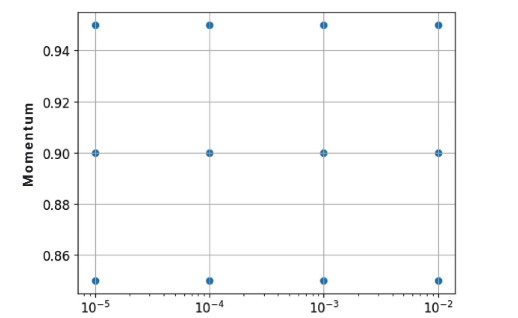

In [ ]:
for factor in range(2, 6):
  lr = 10 ** -factor

### **<div style="font-family:'JetBrains Mono',serif;">随机搜索 ( Random Search )**

**<div style="font-family:'JetBrains Mono',serif;">随机搜索采用不同的方法。它不是设定值，而是在给定范国内随机选择它们。**

**<div style="font-family:'JetBrains Mono',serif;">np.random.uniform(2,6) 函数在2到6之间选择一个数字，使我们能够探索更多种类的学习率。随机搜索通常更有效，因为它避免了不必要的测试并增加了找到最佳设置的机会。**

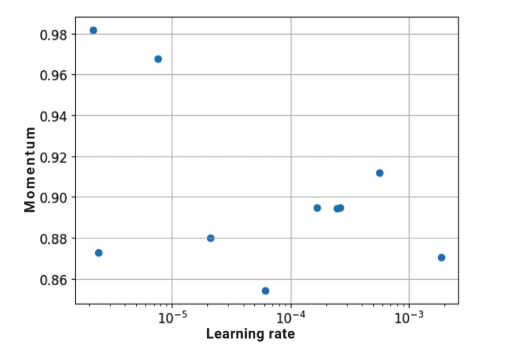

In [ ]:
factor = np.random.uniform(2, 6)
lr = 10 ** -factor

<div style="font-family:'JetBrains Mono',serif;">在2到4之间随机抽取一个学习率因子，使得学习率（ lr ）在10^(-2)到10^(-4)

随机采样0.85和0.99之间的动量

In [ ]:
for idx in range(10):
    # Randomly sample a learning rate factor between 2 and 4
    factor = np.random.uniform(2, 4)
    lr = 10 ** -factor

    # Randomly select a momentum between 0.85 and 0.99
    momentum = np.random.uniform(0.85, 0.99)

    values.append((lr, momentum))

plot_hyperparameter_search(values)